# Time series

see https://pythondata.com/forecasting-time-series-data-with-prophet-part-2/

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os
#from pivottablejs import pivot_ui
import sys
import warnings

warnings.filterwarnings("ignore")
 
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')

In [2]:
from fbprophet import Prophet

In [3]:
from sqlalchemy import create_engine
from decouple import config

In [4]:
#val = !cat '/home/jovyan/.env'
#db=val[0].split('=')[1];
db=config('DATABASE_URL')

In [5]:
engine = create_engine(db)

In [6]:
sql = '''
SELECT        
    d.FiscalYear,
    d.FiscalMonth,
	SUM(t.NetSalesAmt) AS sales

FROM            
	BRS_TransactionDW AS t
    
	INNER JOIN BRS_Item AS i 
	ON t.Item = i.Item 

	INNER JOIN BRS_Customer AS c 
	ON t.Shipto = c.ShipTo 
    
    INNER JOIN BRS_SalesDay AS d
    ON t.Date = d.SalesDate

WHERE         
	(i.SalesCategory = 'MERCH') AND 
	(t.CalMonth BETWEEN 201701 and 201910) AND
	(1=1)

GROUP BY 
	d.FiscalYear,
    d.FiscalMonth

'''

In [7]:
#sql = "select  distinct CustGrpWrk from BRS_Customer where CustGrpWrk like 'Den%' " 

In [8]:
%time df = pd.read_sql_query(sql, engine);

CPU times: user 14.8 ms, sys: 3.02 ms, total: 17.8 ms
Wall time: 3.92 s


In [9]:
df.head

<bound method NDFrame.head of     FiscalYear  FiscalMonth        sales
0         2017       201701  22934300.28
1         2017       201703  20419759.87
2         2017       201708  17563630.46
3         2017       201710  27811385.73
4         2018       201804  19740163.24
5         2018       201806  22447310.16
6         2018       201811  19719468.72
7         2019       201907  21388500.22
8         2019       201909  19649751.13
9         2017       201704  17939925.68
10        2017       201705  27802504.52
11        2017       201706  20278439.80
12        2017       201707  20204599.99
13        2018       201801  23852328.27
14        2018       201802  17993458.28
15        2017       201702  16772170.12
16        2017       201709  19064866.96
17        2017       201711  20141491.00
18        2018       201803  21697535.82
19        2018       201805  29399501.31
20        2018       201812  16035394.21
21        2019       201901  23678534.40
22        2019       201906

In [10]:
df[['FiscalMonth']] = df[['FiscalMonth']].mod(100)

In [11]:
df.columns.tolist()

['FiscalYear', 'FiscalMonth', 'sales']

In [12]:
df2 = df.pivot(index='FiscalMonth', columns='FiscalYear', values='sales')

In [13]:
df2.head()

FiscalYear          2017         2018         2019
FiscalMonth                                       
1            22934300.28  23852328.27  23678534.40
2            16772170.12  17993458.28  17866510.13
3            20419759.87  21697535.82  23152930.32
4            17939925.68  19740163.24  19237464.99
5            27802504.52  29399501.31  29726713.70

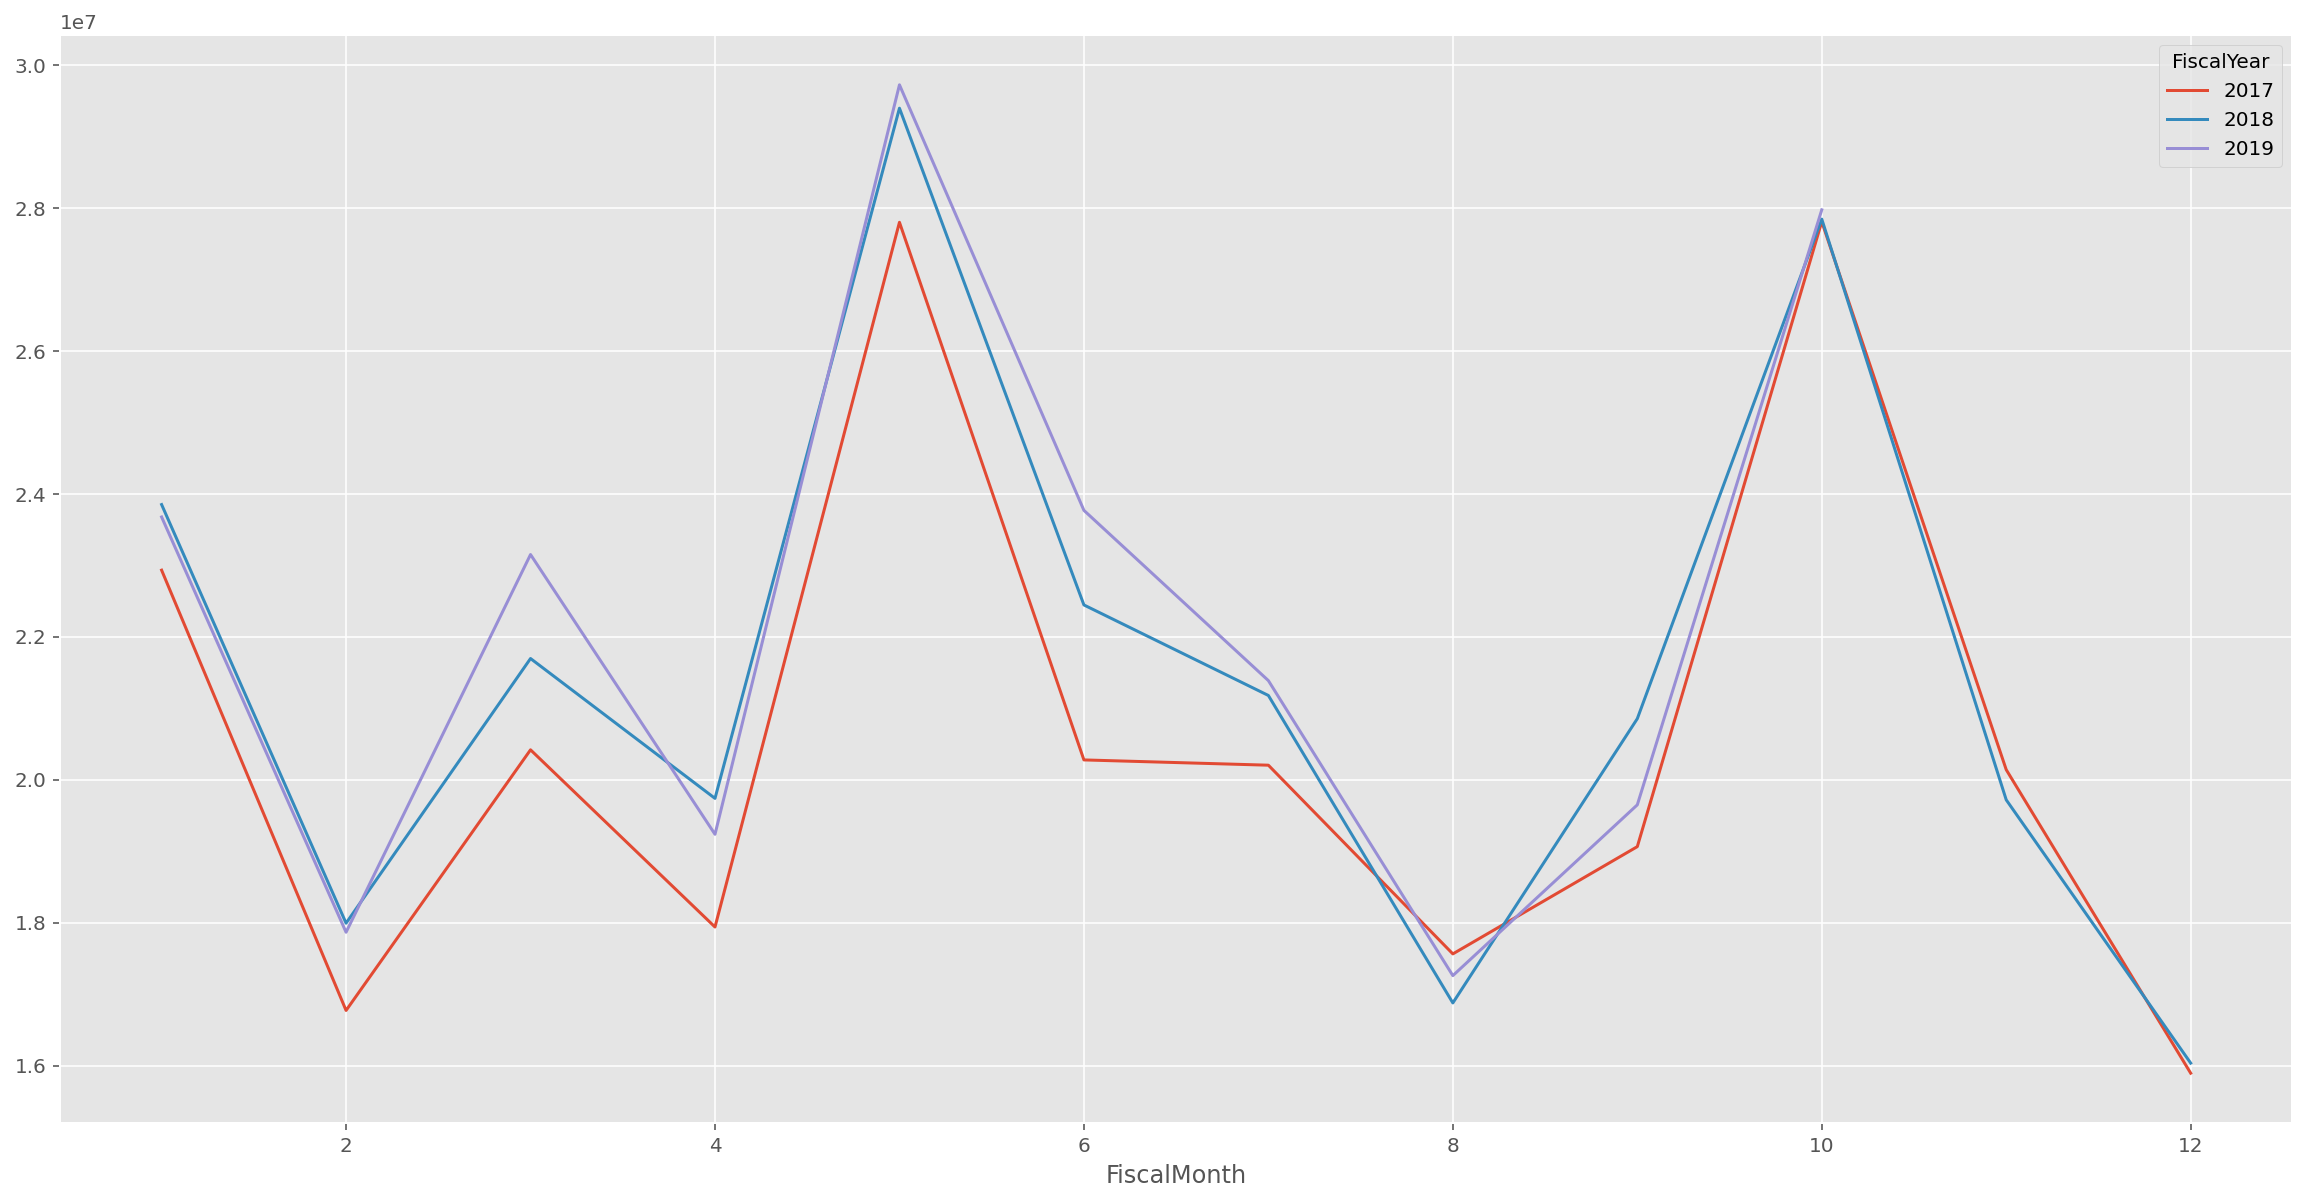

In [14]:
df2.plot()